# Categorical data
Plotting when one of the main variables is categorical

Three main family of plots
- Categorical scatterplots:

    - stripplot() (with kind="strip"; the default)
    - swarmplot() (with kind="swarm")

- Categorical distribution plots:

    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")

- Categorical estimate plots:

    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")

## Categorical scatterplots

We'll use higher level interface **catplot**

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
tips.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

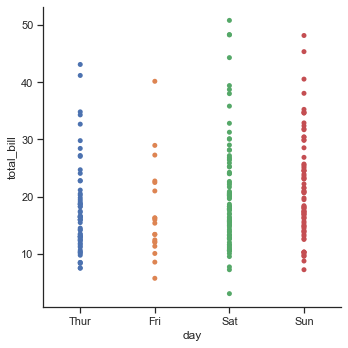

In [2]:
#The default representation of the data in catplot() uses a scatterplot.
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

As you can see, all of the points belonging to one category  fall on the same position along the categorical variable axis.

stripplot(default kind of catplot), adjust the positions of points on the categorical axis with a small amount of random “jitter”

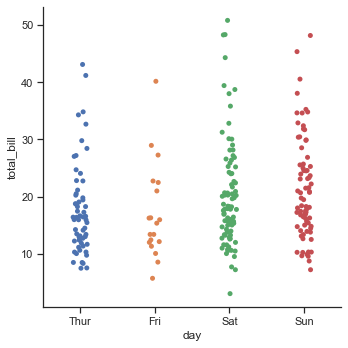

In [3]:

sns.catplot(x="day", y="total_bill", data=tips);

Other approach(swarmplot) adjusts the points along the categorical axis to avoid overlap.

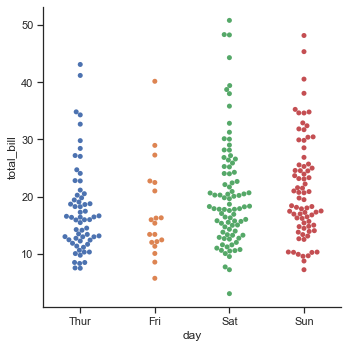

In [4]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

Again, we can plot more than two variable using **hue**.

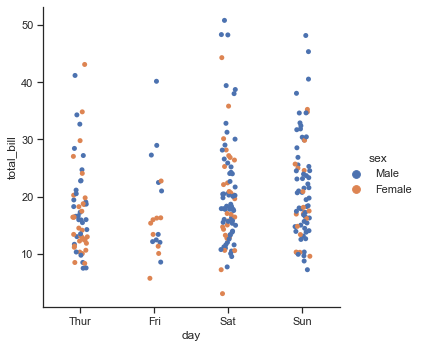

In [5]:
sns.catplot(x="day", y="total_bill", hue="sex", data=tips);

Scalar data has an inherent order defined by real line $\mathbb{R}$. For categorical data it is not very clear. Seaborn makes best guess but you can always control the order.



# categorical(discrete) variables
- **nominal variable**: has no intrinsic ordering to its categories like color
- **ordinal variable**: has a clear ordering like low high medium




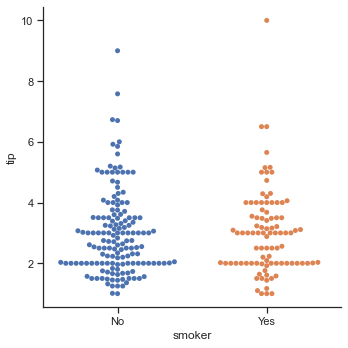

In [6]:
sns.catplot(x="smoker", y="tip",kind= 'swarm',  order=["No", "Yes"], data=tips);

If category names are relatively long or there are many categories, swap x and y

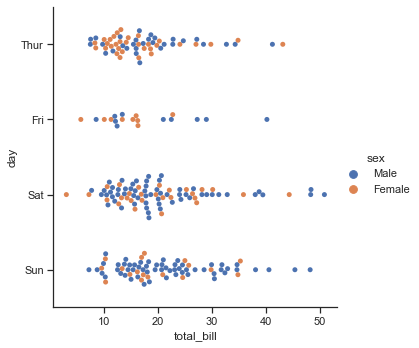

In [7]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="swarm", data=tips);

# Distributions of observations within categories

Scatter plots are limited in visualizing distribution of values when we have lots of datapoints.

One can visualize the summary of distribution in these scenarios.

# Box plot (well known graphical representations of a probability distribution)



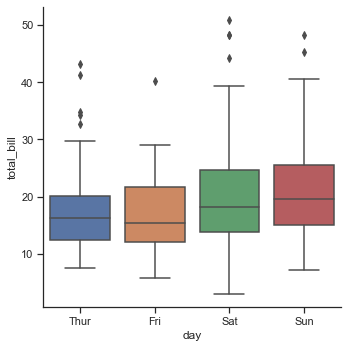

In [8]:
# Q1(25), Q2(50), Q3(75), IQR = Q3-Q1
# outlier outside Q1-1.5IQR Q3+1.5IQR
# Note: outlier as displayed as individual points
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

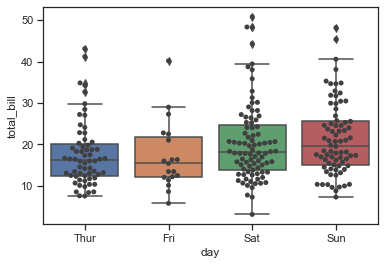

In [9]:
# Let's overlay points
# Chris Haddad provided plt.close solution for 2 blank figures after current one.
# other solution is in the next cell. Seems like calling catplot multiple time is an issue

fig, ax = plt.subplots()

# sns.catplot(x="day", y="total_bill", kind="box", data=tips, ax= ax);
# plt.close()
# sns.catplot(x="day", y="total_bill", kind="strip",color='black' , data=tips, ax=ax);
# plt.close()

ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

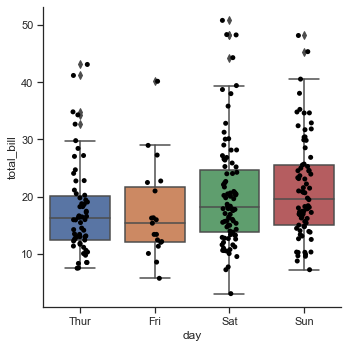

In [10]:
# Let's overlay points
g = sns.catplot(x="day", y="total_bill", kind="box", data=tips);

sns.stripplot(x="day", y="total_bill", color='black' , data=tips, ax=g.ax);


## Again we can play with *hue* semantics

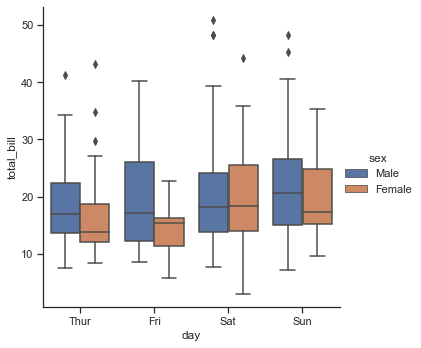

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips);

Above default behavior is called “dodging” and assumes that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging.

seaborn does it best if nesting is not possible.



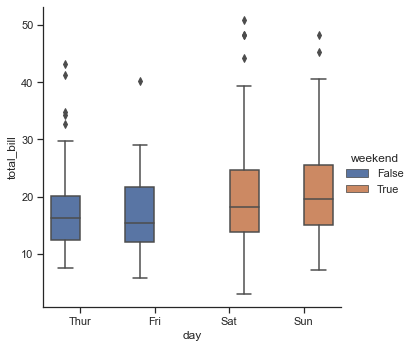

In [12]:
#Let's get the tips only for the weekend
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])

#
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", data=tips);


For large data set, we can better see the shape of the distribution using **boxen** plot

Here is the paper for more information

https://vita.had.co.nz/papers/letter-value-plot.html

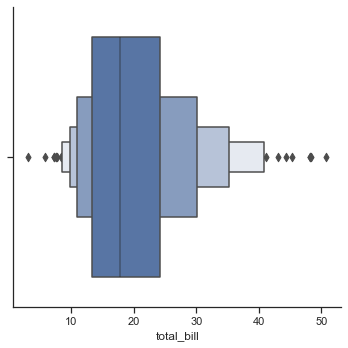

In [13]:
# (Old warning, fixed) Looks like warning is related to matplotlib changes.
# See https://github.com/mwaskom/seaborn/issues/1629
sns.catplot(x='total_bill', kind="boxen", data=tips)

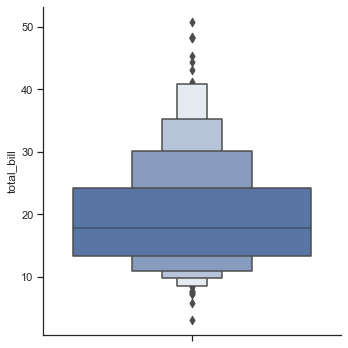

In [14]:
sns.catplot(y='total_bill', kind="boxen", data=tips)

<AxesSubplot:xlabel='total_bill'>

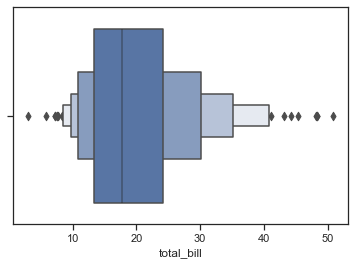

In [15]:
sns.boxenplot(x='total_bill', data=tips)

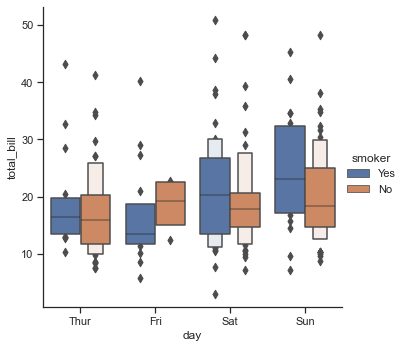

In [16]:
# try plot by smoker
sns.catplot(x='day', y='total_bill', hue="smoker", kind="boxen", data=tips)

# Violinplots ( boxplot + kernel density estimation )

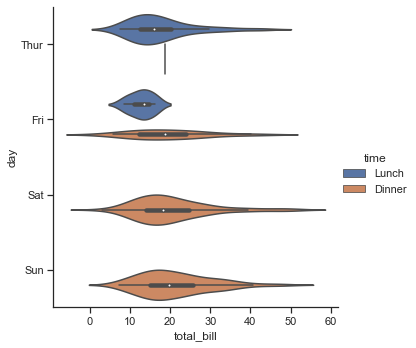

In [17]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)

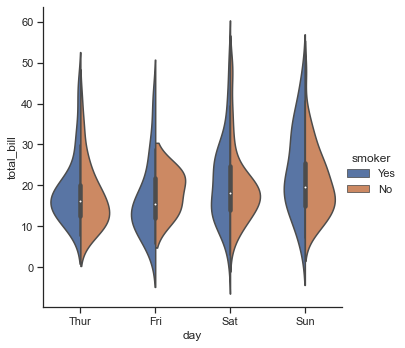

In [18]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips)

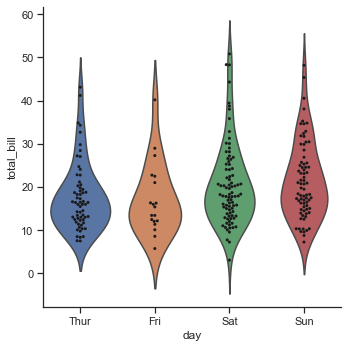

In [19]:
#Let's create a violin plot and overlay the data points on it
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)

#Swatmplot overlaying the data points
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# Statistical estimation(central tendency) within categories

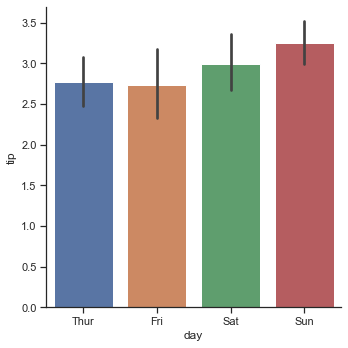

In [20]:
sns.catplot(x="day", y="tip", kind="bar", data=tips)

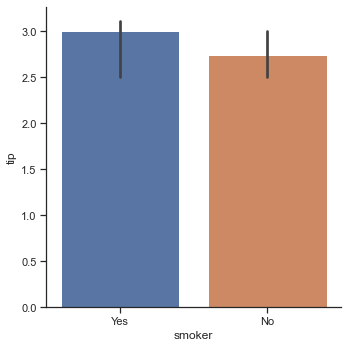

In [21]:
# from tips data set display bar plot of median tip for smoker(yes/no)
import numpy as np

sns.catplot(x="smoker", y="tip", kind="bar", estimator=np.median, data=tips)

In [22]:
titanic = sns.load_dataset("titanic")
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

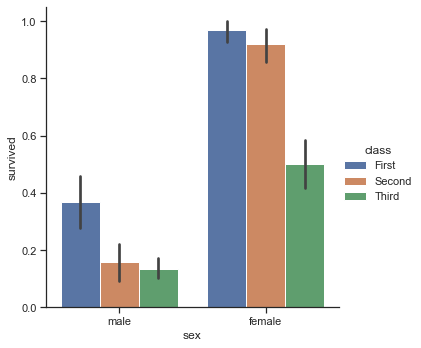

In [23]:
#Let's revisit the survival data set for the titanic passengers...
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

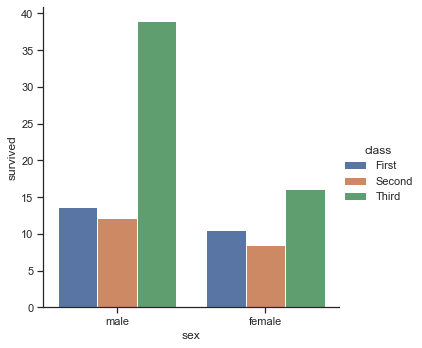

In [24]:
# can you display percentage survived
sns.catplot(x="sex", y="survived", hue="class", estimator=lambda x:(len(x)/len(titanic))*100 ,
            kind="bar", data=titanic)

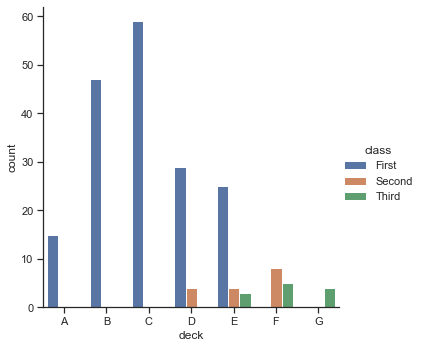

In [25]:
# display by class too
sns.catplot(x="deck", kind="count", hue="class", data=titanic)

# Point plot(same as bar plot but without bar)

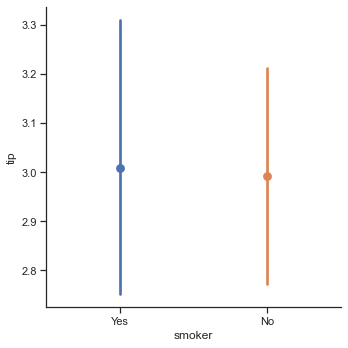

In [26]:
sns.catplot(x="smoker", y="tip", hue= "smoker",kind="point", data=tips)

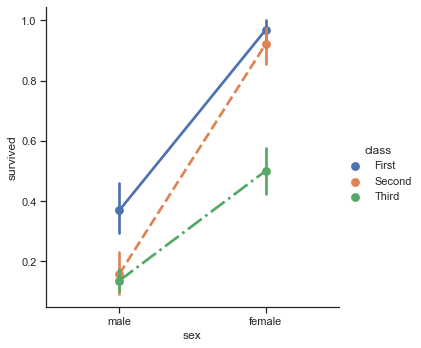

In [27]:
# For black and white compatibility
sns.catplot(x="sex", y="survived", hue="class", kind="point", linestyles=["-", "--", "-."], data=titanic);

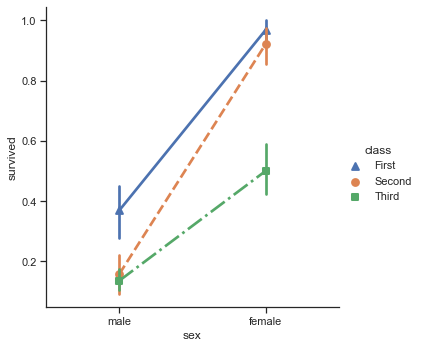

In [28]:
# need to add marker too
sns.catplot(x="sex", y="survived", hue="class", kind="point",markers=["^", "o", "s"],
            linestyles=["-", "--", "-."], data=titanic);

# Multiple relationships with facets (grid or panel charts)

In [29]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

C:\Users\ddalton\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


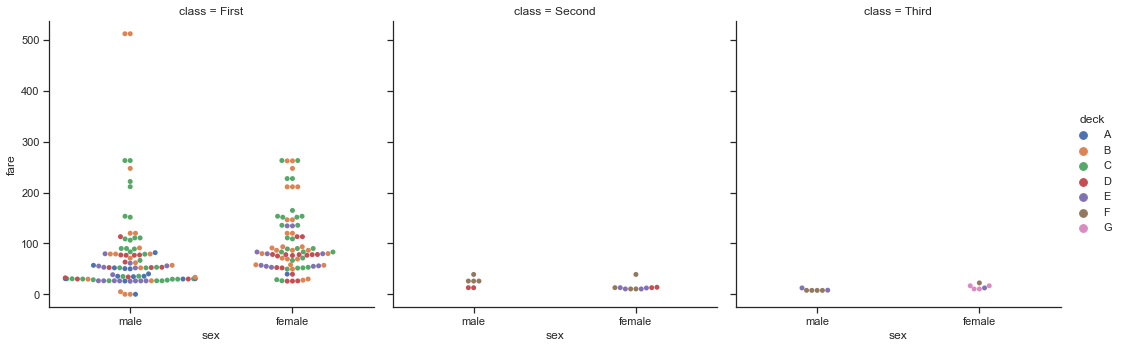

In [30]:
sns.catplot(x="sex", y="fare", hue="deck",
            col="class",
            kind="swarm", data=titanic);

# Visualizing the distribution 

C:\Users\ddalton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

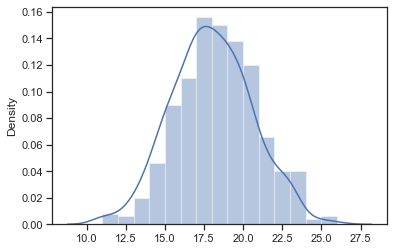

In [31]:
import numpy as np
x = np.random.binomial(30, .6, size = 500)
sns.distplot(x)

C:\Users\ddalton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddalton\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

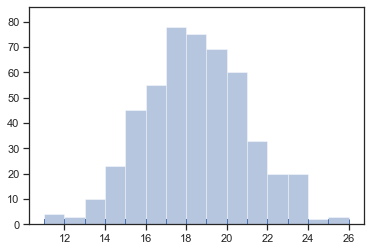

In [32]:
sns.distplot(x, kde=False, rug=True)

# KDE - univariate analysis

Builds a normal distribution for each point. It requires a kernel, which it uses a normal kernel, which integrates to 1. These normal distributions are then summed up using the trapezoidal rule and then normalized.

These plots are used when you want to model your output variable. Since it represents a univariate distribution, it does not compare it to anything else but describes what the output variable looks like. This allows you to do more specific analysis, specially if you're tryig to estimate the distribution in univariate analysis.

<AxesSubplot:>

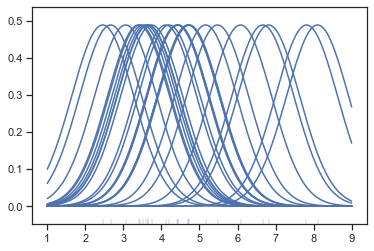

In [33]:
from scipy import stats, integrate

x = np.random.normal(5, 1.3, 25)
bandwidth = 1.06 * x.std() * x.size ** (-1/5.)
support = np.linspace(1,9,200)

kernels = []

for i in x:
    kernel = stats.norm(i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="b")

sns.rugplot(x, linewidth=0.3)

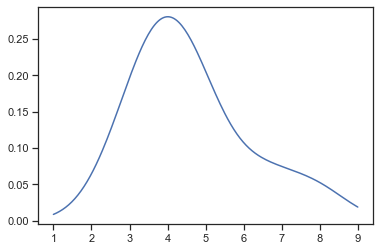

In [34]:
#This results in the KDE :
dens = np.sum(kernels,axis=0)
dens /= integrate.trapz(dens, support)
plt.plot(support, dens)

C:\Users\ddalton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

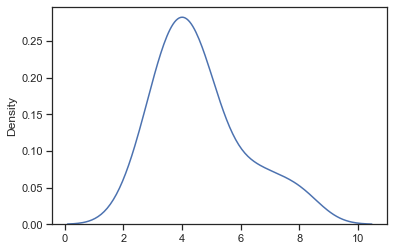

In [35]:
sns.distplot(x, hist=False)

In [36]:
from scipy.stats import expon

C:\Users\ddalton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

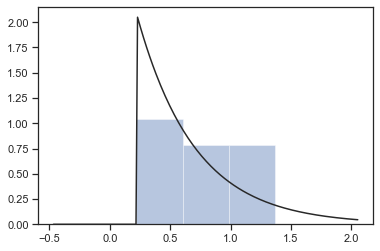

In [37]:
x= np.random.exponential(size = 10)
sns.distplot(x, kde=False, fit=expon)

# Visualizing distribution of two variable

Joint plots can provide a lot of insight as to how two variables relate to each other.

In [38]:
from scipy.stats import multivariate_normal

In [39]:
rv = multivariate_normal([1, 1], 1)

In [40]:
import pandas as pd
x2d= rv.rvs(size=100, random_state=1)
df = pd.DataFrame(x2d, columns=["x1", "x2"])
print(x2d)

[[ 2.62434536e+00  3.88243586e-01]
 [ 4.71828248e-01 -7.29686222e-02]
 [ 1.86540763e+00 -1.30153870e+00]
 [ 2.74481176e+00  2.38793099e-01]
 [ 1.31903910e+00  7.50629625e-01]
 [ 2.46210794e+00 -1.06014071e+00]
 [ 6.77582796e-01  6.15945645e-01]
 [ 2.13376944e+00 -9.98912673e-02]
 [ 8.27571792e-01  1.22141582e-01]
 [ 1.04221375e+00  1.58281521e+00]
 [-1.00619177e-01  2.14472371e+00]
 [ 1.90159072e+00  1.50249434e+00]
 [ 1.90085595e+00  3.16272141e-01]
 [ 8.77109774e-01  6.42305657e-02]
 [ 7.32111920e-01  1.53035547e+00]
 [ 3.08339248e-01  6.03246473e-01]
 [ 3.12827300e-01  1.54794359e-01]
 [ 3.28753869e-01  9.87335401e-01]
 [-1.17310349e-01  1.23441570e+00]
 [ 2.65980218e+00  1.74204416e+00]
 [ 8.08164448e-01  1.12371036e-01]
 [ 2.52841706e-01  2.69245460e+00]
 [ 1.05080775e+00  3.63004353e-01]
 [ 1.19091548e+00  3.10025514e+00]
 [ 1.12015895e+00  1.61720311e+00]
 [ 1.30017032e+00  6.47750154e-01]
 [-1.42518198e-01  6.50657278e-01]
 [ 7.91105767e-01  1.58662319e+00]
 [ 1.83898341e+00  1

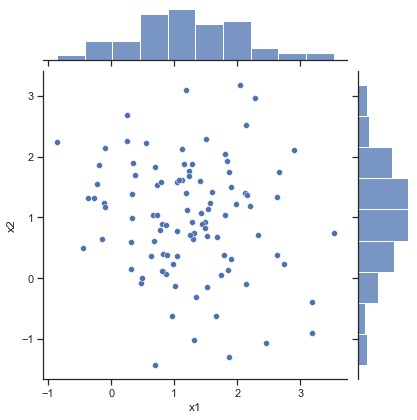

In [41]:
# try changing default from scatter to hex, kde
sns.jointplot(x="x1", y="x2", data=df);

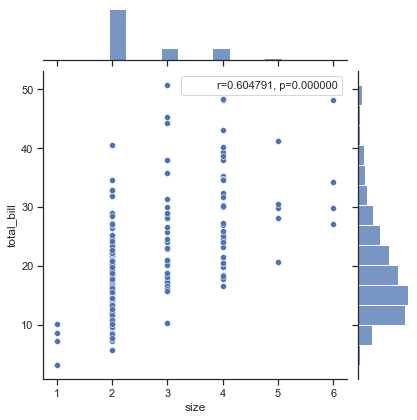

In [42]:
from scipy.stats import spearmanr
tips = sns.load_dataset("tips")

g = sns.jointplot(x="size", y="total_bill", data=tips)
r, p = stats.spearmanr(tips['size'], tips['total_bill'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

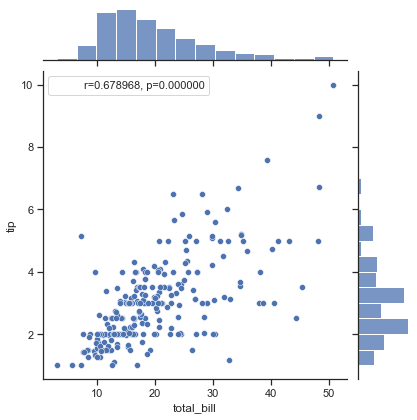

In [43]:
g = sns.jointplot(x="total_bill", y="tip", data=tips)
r, p = stats.spearmanr(tips['total_bill'], tips['tip'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

C:\Users\ddalton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


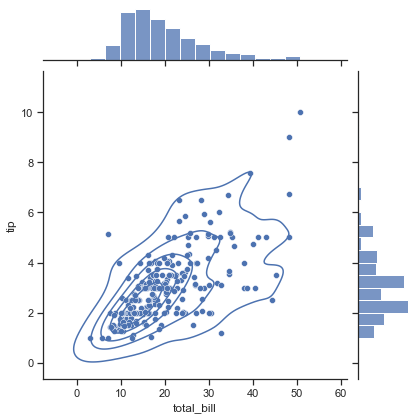

In [44]:
g = (sns.jointplot("total_bill", "tip", data=tips)
     .plot_joint(sns.kdeplot, n_levels=6))

#.plot_joint allows you to overlay another plot on top of the previous one.

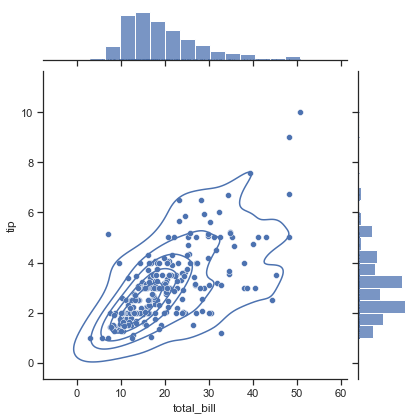

In [45]:
g = (sns.jointplot(x="total_bill", y="tip", data=tips)
     .plot_joint(sns.kdeplot, n_levels=6)
     .plot_marginals(sns.rugplot))

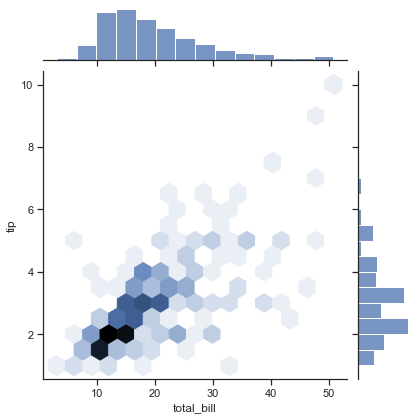

In [46]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

# Pairwise relationships

In [47]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

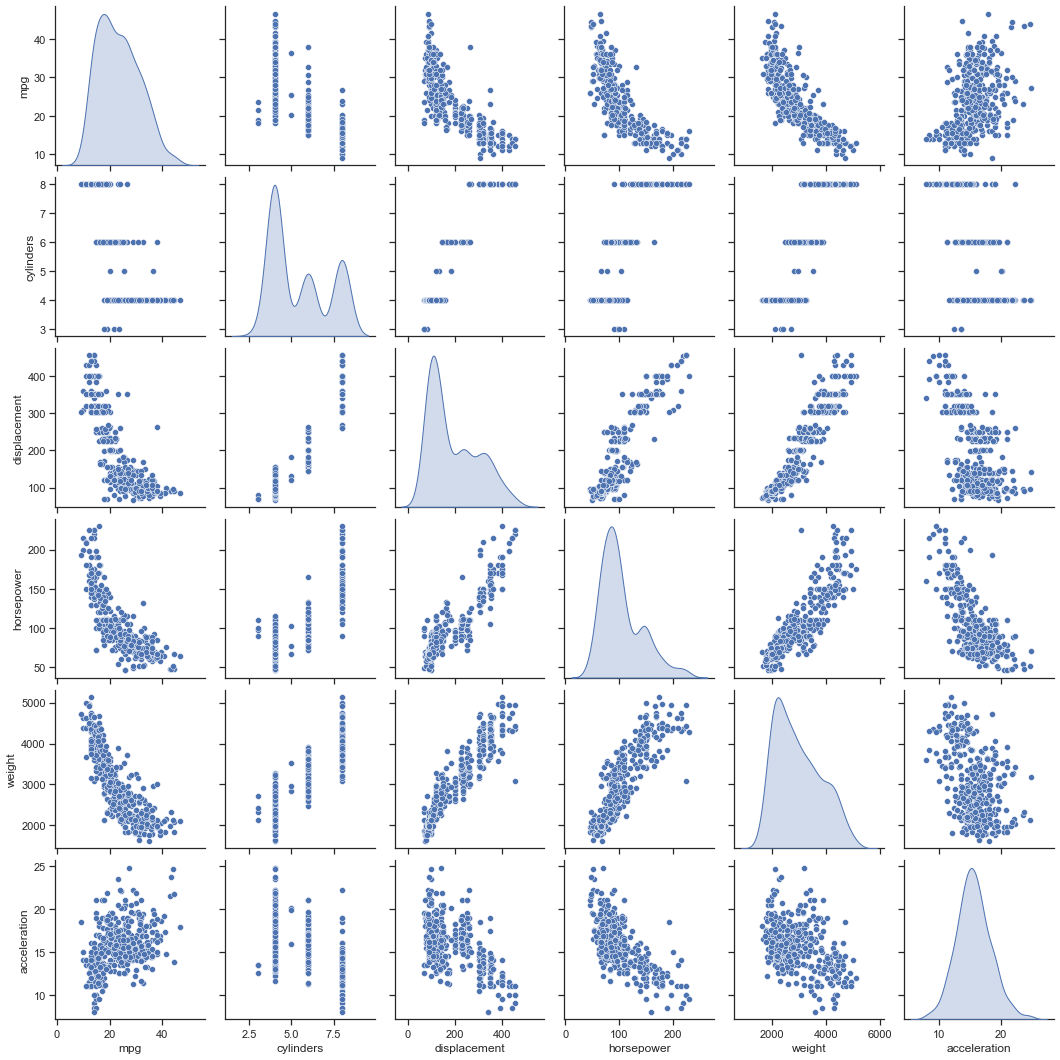

In [48]:
# try chaining diag plot to kde
joint_grid_inst= sns.pairplot(df_mpg.iloc[:, 0:-3], diag_kind='kde')

In [49]:
# pairplot is build on top of PariGrid object
type(joint_grid_inst)

seaborn.axisgrid.PairGrid

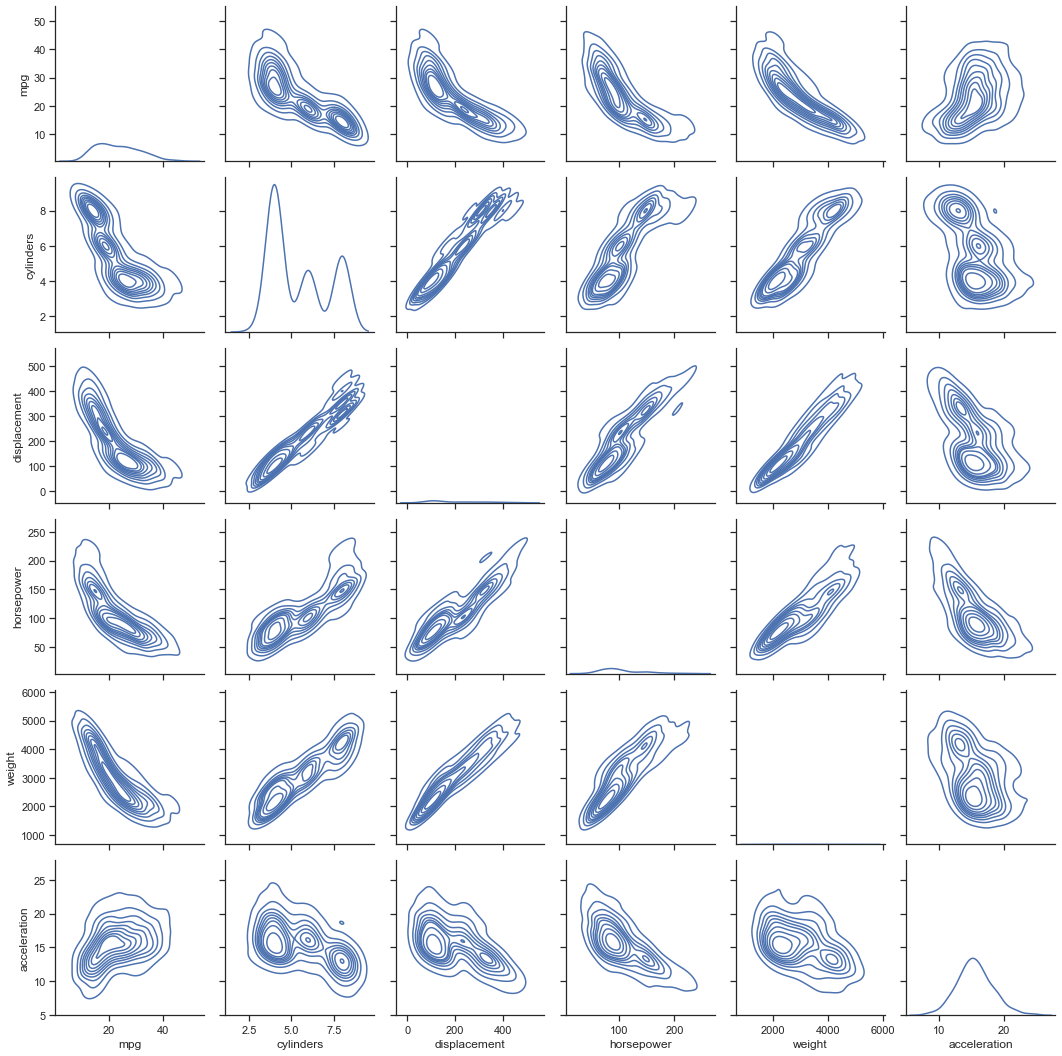

In [50]:
g = sns.PairGrid(df_mpg.iloc[:, 0:-3].dropna())
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

# Realtionship(linear) among variables

In [51]:
iris_df = sns.load_dataset('iris')
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

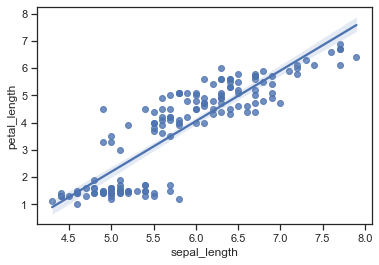

In [52]:
sns.regplot(x="sepal_length", y="petal_length", data=iris_df)

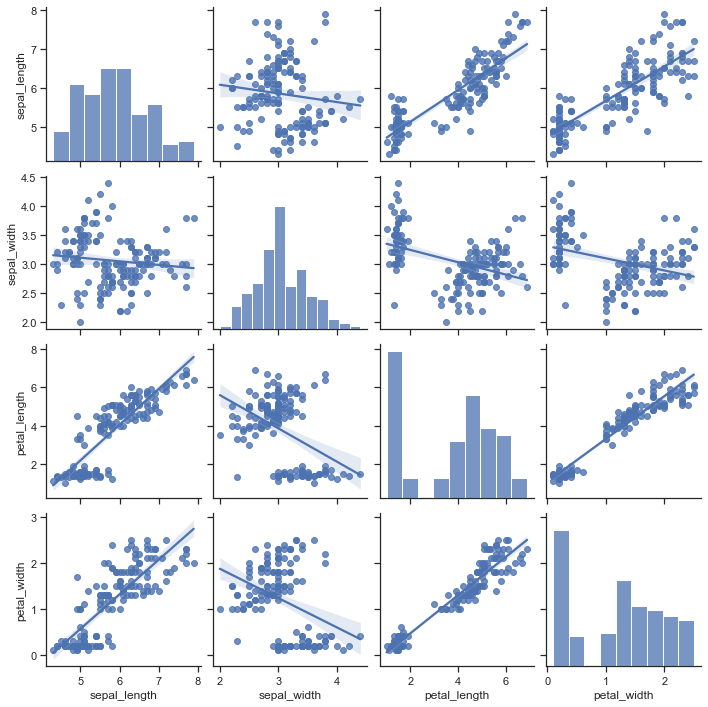

In [53]:
sns.pairplot(iris_df,kind="reg")

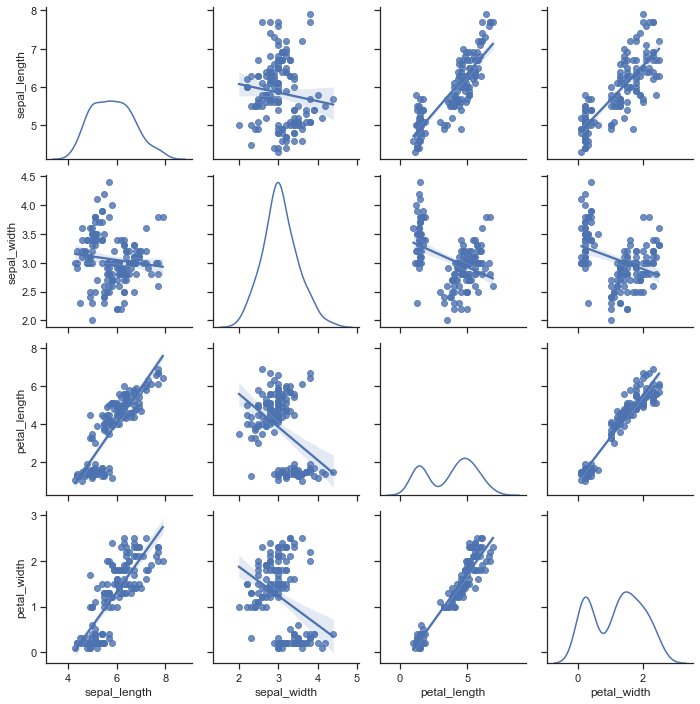

In [54]:
# create a PairGrid and map kdeplot on diagonal and regression of diaglonal
g = sns.PairGrid(iris_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot)

# Heatmap

This is a very useful plot when you want to see the relationship between 2 variables, alternatively you can also use a 2D-KDE.

In [55]:
flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")

flights

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

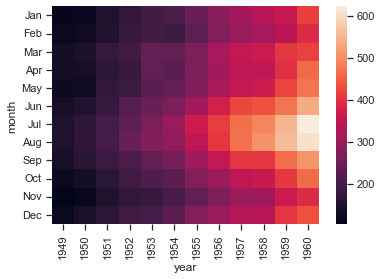

In [56]:
ax = sns.heatmap(flights)

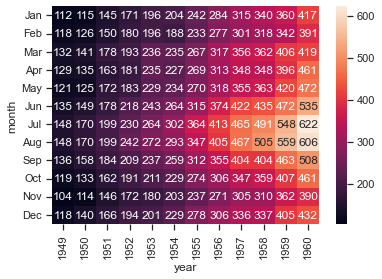

In [57]:
ax = sns.heatmap(flights, annot=True, fmt="d")

# FacetGrid

This is a tool that allows you more granular control over what you want to visualize. 

This is a great tool to use if you're dealing with a dataframe that has lots of columns since it allows you to plot many subplots with the data you want to look at.

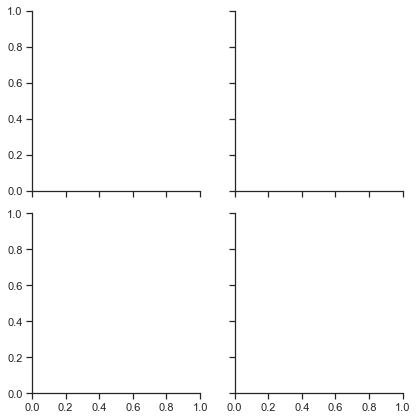

In [58]:
#This give us a preview of the number of plot we will have in the end, it also serves as a sanity check.
g = sns.FacetGrid(tips, col="time", row="smoker")

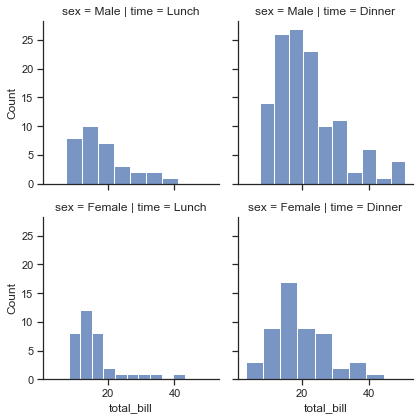

In [59]:
#Plot the total bill distribution based on smoker and time of day
g = sns.FacetGrid(tips, col="time", row="sex")
g = g.map(sns.histplot, "total_bill")

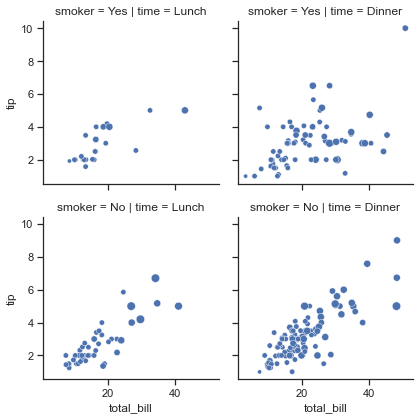

In [60]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(sns.scatterplot, "total_bill", "tip", size="size", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

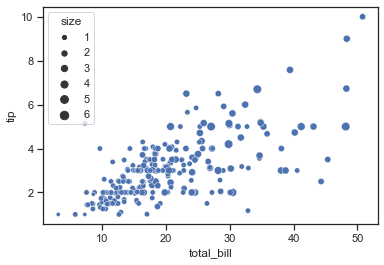

In [61]:
#Let's look at what a scatterplot looks like....
sns.scatterplot(x="total_bill", y="tip", size="size", data=tips)

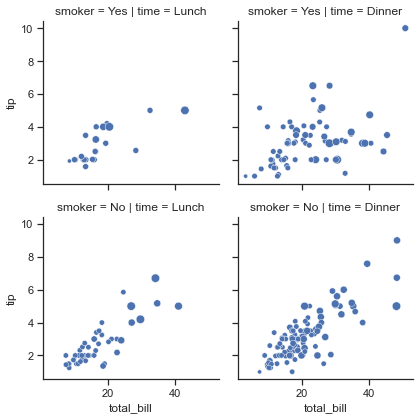

In [62]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map_dataframe(sns.scatterplot, "total_bill", "tip", size="size")

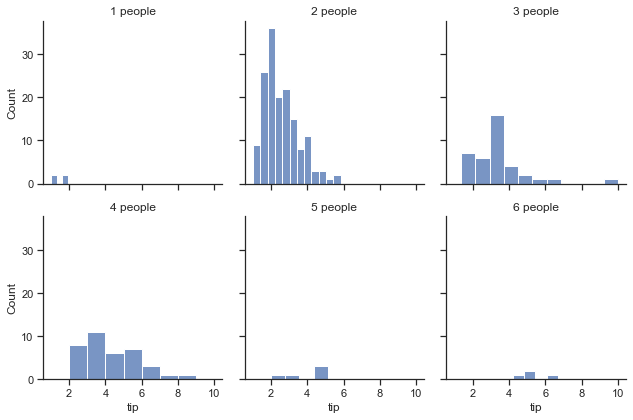

In [63]:
g = sns.FacetGrid(tips, col="size", col_wrap=3)
g = g.map(sns.histplot, "tip", kde=False).set_titles("{col_name} people")

# Geo map




## [Folium](https://python-visualization.github.io/folium/). It uses Leaflet - a JavaScript library for interactive maps

We are only scratching the surface. It is a bit more involved subject.

In [64]:
# !pip install folium

In [65]:
import folium
m = folium.Map(location=[39.6766, -104.9619])
m

# One can  choose different tiles

In [66]:
folium.Map(
    location=[39.675938, -104.960721],
    tiles='Stamen Toner',
    zoom_start=13
)

# Markers

In [67]:
m = folium.Map(
    location=[40.211209, -105.821088],
    zoom_start=11,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([40.249466, -105.827617], popup='<i>Grand lake</i>', tooltip=tooltip).add_to(m)
folium.Marker([40.144075, -105.844817], popup='<b>Lake Granby</b>', tooltip=tooltip).add_to(m)

m

In [68]:
# another way to do points from pandas
import numpy as np
import pandas as pd
import folium

xlat=[40, 30, 20, 10, 0, -10]
xlon=[-105, -100, -90, -100, -108, -80]
df = pd.DataFrame({'Lat': xlat, 'Lon': xlon})  # make some points and put in a dataframe

clist=[]  # make an empty list of locations
for i in range(len(df)):
    clist.append([df.iloc[i]['Lat'], df.iloc[i]['Lon']])  # append lat/lons to clist to make list of lists
print(clist)

map=folium.Map(location=[20,-105], zoom_start=4)  # Denver as start zoom location, zoom out to level 6
for c in clist:
    map.add_child(folium.Marker(location=c,popup="Site is here\n" + str(c),
      icon=folium.Icon(color='blue')))
map.save("Map_g1.html")        # Now point browser at that file
map

[[40, -105], [30, -100], [20, -90], [10, -100], [0, -108], [-10, -80]]


In [69]:


m = folium.Map(
    location=[-0.760488, -90.331771],
    zoom_start=14,
    tiles='Stamen Terrain'
)

folium.Circle(
    radius=100,
    location=[-0.760488, -90.331771],
    popup='Tortuga bay',
    color='crimson',
    fill=False,
).add_to(m)
m

In [70]:
# long latitude pop up
m = folium.Map(
    location=[-0.307781, -90.691985],
    zoom_start=8,
    tiles='Stamen Terrain'
)
m.add_child(folium.LatLngPopup())  # click on map to get pop up


m


GeoJson support

http://geojson.org/


!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/antarctic_ice_edge.json

!head -n 10 antarctic_ice_edge.json

!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/antarctic_ice_shelf_topo.json

!head antarctic_ice_shelf_topo.json

In [71]:

antarctic_ice_edge = 'antarctic_ice_edge.json'
antarctic_ice_shelf_topo = 'antarctic_ice_shelf_topo.json'

m = folium.Map(
    location=[-59.1759, -11.6016],
    zoom_start=2
)

folium.GeoJson(
    antarctic_ice_edge,
    name='geojson'
).add_to(m)

folium.TopoJson(
    open(antarctic_ice_shelf_topo),
    'objects.antarctic_ice_shelf',
    name='topojson'
).add_to(m)

folium.LayerControl().add_to(m)


m

# Choropleth maps

Visualizing a quantity(population density or per-capita income.) using map

!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv

!head -n 10 US_Unemployment_Oct2012.csv

!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json

!head -n 10 us-states.json

In [72]:
import pandas as pd

state_geo = 'us-states.json'

state_unemployment = 'US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Encode addresses using geopy

In [73]:
from geopy.geocoders import ArcGIS
addrs=['2155 E Wesley Ave, Denver, CO 80208',
  '8500 Pena Blvd, Denver, CO 80249',
  '1600 Pennsylvania Ave NW, Washington, DC 20500']  # DU engineering school, Denver Airport and the White House
nom=ArcGIS()
for addr in addrs:
    n=nom.geocode(addr)
    print(n)
    print(n.latitude)
    print(n.longitude)
df=pd.DataFrame({'Addr': addrs},
  index=['DU-ECS','DEN','WHouse'])
df['Coord']=df['Addr'].apply(nom.geocode)
df['Lat']=df['Coord'].apply(lambda x: x.latitude)
df['Lon']=df['Coord'].apply(lambda x: x.longitude)
df.drop('Coord', axis=1, inplace=True)
print(df)
clist=[]
for i in range(len(addrs)):
    clist.append([df.iloc[i]['Lat'], df.iloc[i]['Lon']])
print(clist)

# pip install folium
import folium
map=folium.Map(location=[39.7,-105], zoom_start=2)  # Denver
for c in clist:
    map.add_child(folium.Marker(location=c,popup="Site is here",
      icon=folium.Icon(color='blue')))
map.save("Map_g3.html")          # Now point browser at that file
map

2155 E Wesley Ave, Denver, Colorado, 80210
39.673844999481844
-104.96145799055763
8500 Pena Blvd, Denver, Colorado, 80249
39.84980499364892
-104.67382996560718
1600 Pennsylvania Ave NW, Washington, District of Columbia, 20500
38.89767510765125
-77.03654699820865
                                                  Addr        Lat         Lon
DU-ECS             2155 E Wesley Ave, Denver, CO 80208  39.673845 -104.961458
DEN                   8500 Pena Blvd, Denver, CO 80249  39.849805 -104.673830
WHouse  1600 Pennsylvania Ave NW, Washington, DC 20500  38.897675  -77.036547
[[39.673844999481844, -104.96145799055763], [39.84980499364892, -104.67382996560718], [38.89767510765125, -77.03654699820865]]


### Encode addresses then color code them

In [74]:
addrs = ['4 Pennsylvania Plaza, New York, NY 10001', '2001 Blake St, Denver, CO 80205',\
         '3900 W Manchester Blvd, Inglewood, CA 90305','1600 Amphitheatre Pkwy, Mountain View, CA 94043',\
             '300 Alamo Plaza, San Antonio, TX 78205']
nom=ArcGIS()
for addr in addrs:
    n=nom.geocode(addr)
    print(n)
    print(n.latitude)
    print(n.longitude)
df=pd.DataFrame({'Addr': addrs})
df['Coord']=df['Addr'].apply(nom.geocode)
df['Lat']=df['Coord'].apply(lambda x: x.latitude)
df['Lon']=df['Coord'].apply(lambda x: x.longitude)
df.drop('Coord', axis=1, inplace=True)
print(df)
clist=[]
for i in range(len(addrs)):
    clist.append([df.iloc[i]['Lat'], df.iloc[i]['Lon']])
print(clist)

# pip install folium
import folium
map=folium.Map(location=[39.7,-105], zoom_start=2)  # Denver
colorlist = ['red','blue','green','orange','purple']
for i,c in enumerate(clist):
    print(c)
    map.add_child(folium.Marker(location=c,popup="Site is here",
      icon=folium.Icon(color=colorlist[i])))
map.save("Map_g4.html")          # Now point browser at that file
map

4 Pennsylvania Plz, New York, New York, 10001
40.75068561398231
-73.99224523095712
2001 Blake St, Denver, Colorado, 80205
39.75611698336718
-104.99411799246171
3900 W Manchester Blvd, Inglewood, California, 90305
33.95822199711493
-118.34194600504914
1600 Amphitheatre Pkwy, Mountain View, California, 94043
37.42197601004595
-122.08452402711126
300 Alamo Plz, San Antonio, Texas, 78205
29.42571900292566
-98.48610997129516
                                              Addr        Lat         Lon
0         4 Pennsylvania Plaza, New York, NY 10001  40.750686  -73.992245
1                  2001 Blake St, Denver, CO 80205  39.756117 -104.994118
2      3900 W Manchester Blvd, Inglewood, CA 90305  33.958222 -118.341946
3  1600 Amphitheatre Pkwy, Mountain View, CA 94043  37.421976 -122.084524
4           300 Alamo Plaza, San Antonio, TX 78205  29.425719  -98.486110
[[40.75068561398231, -73.99224523095712], [39.75611698336718, -104.99411799246171], [33.95822199711493, -118.34194600504914], [37.42

### Map worldwide volcanos and color code by elevation

In [75]:
df = pd.read_csv('wv2.csv',encoding='ANSI')
df.columns=['Name','Country','Type','Lat','Lon','Elev']
df.dropna(inplace=True)

def get_color(row):  # set color based on volcano height in meters
    if row['Elev']<0:
        return "blue"
    elif row['Elev']<1000:
        return "green"
    elif row['Elev']<2000:
        return "orange"
    else:
        return "red"
    
df['color'] = df.apply(get_color,axis=1)  # apply to each row and return color
map=folium.Map(location=[39.7,-105], zoom_start=2)  # Denver
def add_map(row):
    loc=[row['Lat'],row['Lon']]
    #print(loc)
    map.add_child(folium.Marker(location=[row['Lat'],row['Lon']],popup=row['Name'],
      icon=folium.Icon(color=row['color'])))
df.apply(add_map,axis=1)   # apply to each row and create folium point on map for each row
map.save("volcano.html")  # save to volcano.html
map

### Make points with Shapely

In [76]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint
from shapely.geometry import box
import numpy as np

pt1=Point(0,0)
print("distance from 0,0 to 3,4: ",Point(0,0).distance(Point(3,4)))  # calculate distance from point 0,0 to 3,4 (sqrt((3-0)**2 + (4-0)**2))

poly1=Polygon([(0,0),(1,1),(1,0)])  # list of tuples that define polygon
print("polygon area, length: ",poly1.area, poly1.length)
print("polygon geometry type: ",poly1.geom_type)
print("ploygon bounds: ",poly1.bounds)

line1=LineString([(0,0),(3,4),(6,0)]) # list of tuples

pt2 = Point(0.5,0.4)
print("is ",pt2," within poly1? ",pt2.within(poly1))
pt2 = Point(0,0)
print("is ",pt2," within poly1? ",pt2.within(poly1))  # poly1 has point 0,0, but that point is not within

distance from 0,0 to 3,4:  5.0
polygon area, length:  0.5 3.414213562373095
polygon geometry type:  Polygon
ploygon bounds:  (0.0, 0.0, 1.0, 1.0)
is  POINT (0.5 0.4)  within poly1?  True
is  POINT (0 0)  within poly1?  False


### Make a list of all volcanos within 500 Nm of Mt. Kilimanjaro

In [77]:
# make points from all the volcanos
# see which volcanoes are within 500 Nautical miles of Kilimanjaro
kili = Point(df[df['Name'] == 'Kilimanjaro']['Lat'], df[df['Name'] == 'Kilimanjaro']['Lon'])  # make point
kilibuffer = kili.buffer(500/60)  # create a 500 Nm buffer around Kilimanjaro
def is_within(row):
    if Point(row['Lat'],row['Lon']).within(kilibuffer):
        print(row['Name'], " is within 500 Nm of Kilimanjaro")
        
_=df.apply(is_within,axis=1)  # loop through all volcanos and print if they are within the buffer
# The _= is to keep pandas from just printing junk because the apply is assumed to return something.
# The _= assigns the return value to a null variable

Barrier  is within 500 Nm of Kilimanjaro
Karisimbi  is within 500 Nm of Kilimanjaro
Karisimbi  is within 500 Nm of Kilimanjaro
Katwe-Kikorongo  is within 500 Nm of Kilimanjaro
Kilimanjaro  is within 500 Nm of Kilimanjaro
Longonot  is within 500 Nm of Kilimanjaro
Marsabit  is within 500 Nm of Kilimanjaro
Menengai  is within 500 Nm of Kilimanjaro
Meru  is within 500 Nm of Kilimanjaro
Nyambeni Hills  is within 500 Nm of Kilimanjaro
Nyamuragira  is within 500 Nm of Kilimanjaro
Nyiragongo  is within 500 Nm of Kilimanjaro
Ol Doinyo Lengai  is within 500 Nm of Kilimanjaro
Suswa  is within 500 Nm of Kilimanjaro
Visoke  is within 500 Nm of Kilimanjaro
Visoke  is within 500 Nm of Kilimanjaro


### Make a triangle that encompases the northernmost, southernmost and westernmost volcano

In [78]:
kili = Point(df[df['Name'] == 'Kilimanjaro']['Lat'], df[df['Name'] == 'Kilimanjaro']['Lon'])
kilibuffer = kili.buffer(500/60)
volcanos = []

def is_within(row):  # function so see if volcano is within 500 Nm of Kilimanjaro
    if Point(row['Lat'],row['Lon']).within(kilibuffer):
        print(row['Name'], " is within 500 Nm of Kilimanjaro")
        return True
    return False

df['kili'] = df.apply(is_within,axis=1)  # mark each volcano as T/F if it is close to Kili
df2 = df[df['kili']].copy()  # filter based on kili field being true or false

northernmost = df2.loc[df2['Lat'].idxmax()]   # df2['Lat'].idxmax() returns the index value or row with max latitude
southernmost = df2.loc[df2['Lat'].idxmin()]   # using the index from the max function to ge the whole row with df.loc[]
westernmost = df2.loc[df2['Lon'].idxmin()]

volcanos.append((northernmost['Lon'],northernmost['Lat']))  # append the volcano lat/lon's to list
volcanos.append((southernmost['Lon'],southernmost['Lat']))
volcanos.append((westernmost['Lon'],westernmost['Lat']))

poly = Polygon(volcanos)  # make a polygon from volcano list
print("\n\ntriangle that includes northern, souther and western most volcanoes near Kili: ",poly)
print("area of triangle: ",poly.area)  # not really the area, these are lat/lon values

map=folium.Map(location=[-3,37], zoom_start=6)  # start zoom on Kilimanjaro
folium.GeoJson(poly).add_to(map)
map

Barrier  is within 500 Nm of Kilimanjaro
Karisimbi  is within 500 Nm of Kilimanjaro
Karisimbi  is within 500 Nm of Kilimanjaro
Katwe-Kikorongo  is within 500 Nm of Kilimanjaro
Kilimanjaro  is within 500 Nm of Kilimanjaro
Longonot  is within 500 Nm of Kilimanjaro
Marsabit  is within 500 Nm of Kilimanjaro
Menengai  is within 500 Nm of Kilimanjaro
Meru  is within 500 Nm of Kilimanjaro
Nyambeni Hills  is within 500 Nm of Kilimanjaro
Nyamuragira  is within 500 Nm of Kilimanjaro
Nyiragongo  is within 500 Nm of Kilimanjaro
Ol Doinyo Lengai  is within 500 Nm of Kilimanjaro
Suswa  is within 500 Nm of Kilimanjaro
Visoke  is within 500 Nm of Kilimanjaro
Visoke  is within 500 Nm of Kilimanjaro


triangle that includes northern, souther and western most volcanoes near Kili:  POLYGON ((36.57 2.32, 36.75 -3.25, 29.2 -1.41, 36.57 2.32))
area of triangle:  20.861150000000002


### Make a polygon around all the volcanos

In [79]:
# putting it all together
df = pd.read_csv('wv2.csv',encoding='ANSI')
df.columns=['Name','Country','Type','Lat','Lon','Elev']
df.dropna(inplace=True)
kili = Point(df[df['Name'] == 'Kilimanjaro']['Lat'], df[df['Name'] == 'Kilimanjaro']['Lon'])  # Mount Kilimanjaro
kilibuffer = kili.buffer(500/60)  # 500 Nm buffer
volcanos = []  # list of volcano lon,lat

def is_within(row):  # function so see if volcano is within 500 Nm of Kilimanjaro
    if Point(row['Lat'],row['Lon']).within(kilibuffer):
        print(row['Name'], " is within 500 Nm of Kilimanjaro")
        volcanos.append((row['Lon'],row['Lat']))
        return True
    return False

df['kili'] = df.apply(is_within,axis=1)  # mark each volcano as T/F if it is close to Kili
df2 = df[df['kili']].copy()  # filter based on kili field

mpt = Polygon(volcanos)  # form a polygon from all the volcanos around Kili
geom = mpt.convex_hull   # convex hull finds the smallest polygon that contains the points

def get_color(row):  # get color based on elevation
    if row['Elev']<0:
        return "blue"
    elif row['Elev']<1000:
        return "green"
    elif row['Elev']<2000:
        return "orange"
    else:
        return "red"
    
df2['color'] = df2.apply(get_color,axis=1)
map=folium.Map(location=[-3,37], zoom_start=6)  # start zoom on Kilimanjaro
def add_map(row):
    loc=[row['Lat'],row['Lon']]
    print(loc)
    map.add_child(folium.Marker(location=[row['Lat'],row['Lon']],popup=row['Name'] + "\n" +str(row["Elev"]),
      icon=folium.Icon(color=row['color'])))
_=df2.apply(add_map,axis=1)   

folium.GeoJson(geom,style_function = lambda feature: {'fillColor': '#228B22'}).add_to(map)
map.save("volcano2.html")

# showing the polygon formed by the points without the convex hull.  It is a mess if you don't use convex hull
map2=folium.Map(location=[-3,37], zoom_start=7)  # start zoom on Kilimanjaro
def add_map(row):
    loc=[row['Lat'],row['Lon']]
    print(loc)
    map2.add_child(folium.Marker(location=[row['Lat'],row['Lon']],popup=row['Name'] + "\n" +str(row["Elev"]),
      icon=folium.Icon(color=row['color'])))
_=df2.apply(add_map,axis=1)   
folium.GeoJson(mpt).add_to(map2)

map2.save("volcano3.html")
map

Barrier  is within 500 Nm of Kilimanjaro
Karisimbi  is within 500 Nm of Kilimanjaro
Karisimbi  is within 500 Nm of Kilimanjaro
Katwe-Kikorongo  is within 500 Nm of Kilimanjaro
Kilimanjaro  is within 500 Nm of Kilimanjaro
Longonot  is within 500 Nm of Kilimanjaro
Marsabit  is within 500 Nm of Kilimanjaro
Menengai  is within 500 Nm of Kilimanjaro
Meru  is within 500 Nm of Kilimanjaro
Nyambeni Hills  is within 500 Nm of Kilimanjaro
Nyamuragira  is within 500 Nm of Kilimanjaro
Nyiragongo  is within 500 Nm of Kilimanjaro
Ol Doinyo Lengai  is within 500 Nm of Kilimanjaro
Suswa  is within 500 Nm of Kilimanjaro
Visoke  is within 500 Nm of Kilimanjaro
Visoke  is within 500 Nm of Kilimanjaro
[2.32, 36.57]
[-1.51, 29.45]
[-1.51, 29.45]
[-0.08, 29.92]
[-3.07, 37.35]
[-0.91, 36.45]
[2.32, 37.97]
[-0.2, 36.07]
[-3.25, 36.75]
[0.23, 37.87]
[-1.41, 29.2]
[-1.52, 29.25]
[-2.76, 39.91]
[-1.18, 36.35]
[-1.47, 29.49]
[-1.47, 29.49]
[2.32, 36.57]
[-1.51, 29.45]
[-1.51, 29.45]
[-0.08, 29.92]
[-3.07, 37.35]


# Resources
Look at this gallery

 https://residentmario.github.io/geoplot/gallery.html
 
## Geoplot and geopandas
- https://github.com/ResidentMario/geoplot
- http://geopandas.org/gallery/plotting_with_geoplot.html